# ATENA-TF Master Welcome

## Exact Port of ATENA-Master Welcome Notebook to TensorFlow 2

This notebook replicates the exact structure of the original `ATENA- Welcome.ipynb` from ATENA-master,
but uses the TensorFlow 2 framework components.

### 📂 Important: Working Directory

**To run this notebook successfully**, start Jupyter from the project root directory:

```bash
# From the atena-tf 2 directory (NOT from Notebooks/)
cd /path/to/atena-tf-2
jupyter notebook
# Then open: Notebooks/ATENA-TF-Master-Welcome.ipynb
```

Alternatively, if running from within Notebooks/, the path setup in the next cell will automatically adjust.

### What you'll learn:
- Environment properties and setup
- Running random "agent" exploration
- Executing custom action sequences
- Understanding the action space and observations
- Viewing reward components and analysis
- Analyst view for detailed exploration


In [3]:
# Fix for gym 0.25.2 compatibility with newer numpy
import numpy as np
if not hasattr(np, "bool8"):
    np.bool8 = np.bool_

# Setup paths - ensure we can import from parent directory
import sys
import os

# Get the notebook's directory and add parent to path
notebook_dir = os.path.dirname(os.path.abspath("__file__")) if "__file__" in dir() else os.getcwd()
parent_dir = os.path.dirname(notebook_dir) if "Notebooks" in notebook_dir else notebook_dir

# Add to path if not already there
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# Core imports
import scipy as sp
import gym

# ATENA imports
import Configuration.config as cfg
from gym_atena.envs.atena_env_cont import ATENAEnvCont
from Evaluation.notebook_utils import *

%matplotlib inline

print("✅ All imports successful!")
print(f"📊 Working directory: {os.getcwd()}")
print(f"🎯 Schema: {cfg.schema}")
print(f"📈 Max steps per episode: {cfg.MAX_NUM_OF_STEPS}")


✅ All imports successful!
📊 Working directory: /Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/Notebooks
🎯 Schema: NETWORKING
📈 Max steps per episode: 12


## Environment Setup

Create the ATENA environment. The environment will automatically load the Snorkel model for humanity scoring.


In [4]:
%%capture
env = gym.make(env_d)


## Environment Properties

Let's explore the action and observation spaces:


In [5]:
# Print environment properties
print("action space size is: ", env.action_space)
print("action space low is: ", env.action_space.low)
print("action space high is: ", env.action_space.high)
print("observation space dimensions are: ", env.observation_space)
print("observation space dimensions are: ", env.observation_space.low)
print("observation space dimensions are: ", env.observation_space.high)
print("reward range is:", env.reward_range)


action space size is:  Box(-3.0, 3.0, (6,), float32)
action space low is:  [-3. -3. -3. -3. -3. -3.]
action space high is:  [3. 3. 3. 3. 3. 3.]
observation space dimensions are:  Box([ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.], [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1.], (51,), float32)
observation space dimensions are:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.]
observation space dimensions are:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1.]

## Reset Environment

Reset to the first dataset and view the initial observation:


In [6]:
print(env.reset())
print("dataset number %d" % env.dataset_number)


[ 1.00000000e+00  0.00000000e+00  1.00000000e+00  2.31267346e-04
  0.00000000e+00  3.44156697e-02  2.31267346e-04  0.00000000e+00
  3.44156697e-02  3.46901012e-04  0.00000000e+00  3.90794277e-02
  9.42298770e-01  0.00000000e+00  9.88289535e-01  4.27035153e-01
  0.00000000e+00  8.50694001e-01  2.09296942e-02  0.00000000e+00
  8.70980471e-02  1.15633674e-03  0.00000000e+00  1.63306117e-01
  1.36447735e-02  0.00000000e+00  5.23395002e-01  1.82701200e-02
  0.00000000e+00  7.94389918e-02  2.41674371e-02  0.00000000e+00
  8.61973688e-02  2.39361711e-02  0.00000000e+00  1.03075869e-01
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
dataset number 0


# Run a Random "Agent"

Let's run a random agent that takes random actions in the environment:


In [7]:
info_hist, r_sum = run_episode(env=env, compressed=True)
simulate(info_hist)


[-0.7565859  -0.9944332  -0.87753636 -2.7000992  -1.0185735  -2.301622  ]
Humanity coefficient applied (same display penalty): 1.0
MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


"Filter on Column 'info_line', using condition '<built-in function ne>', with term '[PSH, ACK]'"

[-2.4668908   2.657489    2.2667081  -0.65430963  1.4827406  -2.034155  ]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[ 0.30561864 -0.4444214  -1.7601435   0.46154892 -2.9128587  -0.8273626 ]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 0.8512827344808511
   compaction_gain: 0
   total_interestingness: 0.8512827344808511
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'ip_dst', using condition '<built-in function eq>', with term '192.150.11.111'"

[-1.7716738  -1.0396903  -0.17473328  0.98053217 -0.13758895  1.3861414 ]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[-1.048652    0.04342427  0.6010577  -0.78009605  1.8633018  -1.9642957 ]
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[ 0.8072916   2.4726791   0.8605352   2.100641   -2.558187    0.19432011]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 0.8326637188199106
   compaction_gain: 0
   total_interestingness: 0.8326637188199106
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'tcp_srcport', using condition '<built-in function ne>', with term '2152'"

[ 0.3650793   0.3315901  -0.17222631 -0.5480935   1.901563   -1.8726084 ]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 0.720574949798801
   compaction_gain: 0
   total_interestingness: 0.720574949798801
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'ip_src', using condition '<built-in function ne>', with term '98.114.205.102'"

[ 2.0509036  -1.5959692  -0.86903995  0.4839675  -2.8306153   2.0119169 ]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: -2.0
   total_interestingness: 0
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'eth_src' and aggregate with '<built-in function len>' on the column 'packet_number'"

[-1.3565208 -1.1686921 -2.067783   1.0532994 -0.5942157 -1.3118633]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[ 0.27805322 -1.90782    -1.0716499   2.1470957   1.0318059  -1.4204828 ]
Humanity coefficient applied (same display penalty): 1.0
MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'eth_src', using condition '<built-in function eq>', with term '00:30:48:62:4e:4a'"

[ 2.3973095 -0.4841385 -1.3894271 -0.0281399 -1.4258282  0.7124384]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: -2.0
   total_interestingness: 0
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'ip_dst' and aggregate with '<built-in function len>' on the column 'packet_number'"

[ 1.2327033   2.3694916   0.12318612 -1.7764983   1.3028167   1.4483488 ]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.7330472214800152
   total_interestingness: 1.7330472214800152
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'tcp_srcport' and aggregate with '<built-in function len>' on the column 'packet_number'"

[np.int64(1), np.int64(4), np.int64(3), np.float64(-0.4500165395438671), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(11), np.int64(7), np.float64(-0.10905161499977112), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(5), np.int64(1), np.float64(0.07692480087280273), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(3), np.int64(4), np.float64(0.16342204809188843), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(6), np.int64(5), np.float64(-0.1300159990787506), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(10), np.int64(5), np.float64(0.3501068949699402), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(6), np.int64(4), np.float64(-0.09134891629219055), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(2), np.int64(3), np.float64(0.08066123723983765), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(3), np.int64(1), np.float64(0.1755499243736267), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(2), np.int64(2), np.float64(0.3578492999076843), np.int64(0), np.int64(0)],

# Run Custom Actions

Now let's run a specific sequence of actions on dataset 0 (Flights dataset).

This example explores large flight delays from DFW airport:
1. Group by departure_delay
2. Filter to LARGE_DELAY
3. Group by origin_airport
4. Filter to DFW
5. Group by delay_reason
6. Group by scheduled_departure
7-12. Navigate back through the states


In [8]:
# Set dataset_number
dataset_number = 0

# Set actions
action_vecs = [
[2, 6, 1, 0.3221167325973511, 0, 0],      #  1: Group by departure_delay
[1, 6, 1, -0.48, 0, 0],                   #  2: Filter LARGE_DELAY
[2, 2, 7, 0.48046758365631, 0, 0],        #  3: Group by origin_airport
[1, 2, 1, 0.48086163997650146, 0, 0],     #  4: Filter DFW
[2, 5, 8, -0.48018680667877, 0, 0],       #  5: Group by delay_reason
[2, 8, 8, 0.444186806678772, 0, 0],       #  6: Group by scheduled_departure
[0, 7, 4, 0.6415030360221863, 0, 0],      #  7: Back
[0, 5, 4, 0.8115951418876648, 0, 0],      #  8: Back
[2, 11, 1, -0.48, 0, 0],                  #  9: Group by day_of_year
[0, 5, 1, -0.45, 0, 0],                   # 10: Back
[0, 11, 4, 0.6415030360221863, 0, 0],     # 11: Back
[0, 6, 1, 0.5015030360221863, 0, 0],      # 12: Back
]

info_hist, r_sum = run_episode(
    dataset_number=dataset_number,
    env=env,
    compressed=False,
    filter_by_field=True,
    continuous_filter_term=True,
    actions_lst=action_vecs,
)

simulate(info_hist, displays=True)


[2, 6, 1, 0.3221167325973511, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.2923061463621609
   total_interestingness: 0.2923061463621609
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


"Group on Column 'ip_src' and aggregate with '<built-in function len>' on the column 'packet_number'"

[1, 6, 1, -0.48, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.1118442475364003
   compaction_gain: 0
   total_interestingness: 1.1118442475364003
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'ip_src', using condition '<built-in function eq>', with term '82.108.13.31'"

[2, 2, 7, 0.48046758365631, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: -2.0
   total_interestingness: 0
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'eth_src' and aggregate with '<built-in function len>' on the column 'packet_number'"

[1, 2, 1, 0.48086163997650144, 0, 0]
Humanity coefficient applied (same display penalty): 1.0
MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'eth_src', using condition '<built-in function eq>', with term '00:26:b9:2b:0b:59'"

[2, 5, 8, -0.48018680667877, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: -2.0
   total_interestingness: 0
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'ip_dst' and aggregate with '<built-in function len>' on the column 'packet_number'"

[2, 8, 8, 0.444186806678772, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.042380209456290396
   total_interestingness: 0.042380209456290396
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'sniff_timestamp' and aggregate with '<built-in function len>' on the column 'packet_number'"

[0, 7, 4, 0.6415030360221863, 0, 0]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[0, 5, 4, 0.8115951418876648, 0, 0]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[2, 11, 1, -0.48, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.04665059850441022
   total_interestingness: 0.04665059850441022
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'tcp_stream' and aggregate with '<built-in function len>' on the column 'packet_number'"

[0, 5, 1, -0.45, 0, 0]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[0, 11, 4, 0.6415030360221863, 0, 0]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[0, 6, 1, 0.5015030360221863, 0, 0]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[np.int64(2), np.int64(6), np.int64(1), np.float32(0.32211673), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(6), np.int64(1), np.float32(-0.48), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(2), np.int64(7), np.float32(0.48046756), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(2), np.int64(1), np.float32(0.48086166), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(5), np.int64(8), np.float32(-0.48018682), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(8), np.int64(8), np.float32(0.4441868), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(7), np.int64(4), np.float32(0.6415031), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(5), np.int64(4), np.float32(0.8115952), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(11), np.int64(1), np.float32(-0.48), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(5), np.int64(1), np.float32(-0.45), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(11), np.int64(4), np.float32(0.6415031), np.int64(0), np.int64(0)],
[np.int64(0), n

,packet_number
ip_src,
0.0.0.0,4
192.168.1.122,7832
212.134.198.29,2
217.206.63.73,2
82.108.1.16,2
...,...
82.109.10.71,2
82.109.65.86,2
87.86.75.181,2


action: Filter on Column 'ip_src', using condition '<built-in function eq>', with term '82.108.13.31' , reward: 4.354076368661009
raw action: [np.int64(1), np.int64(6), np.int64(1), np.float32(-0.48), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.1118442475364003), ('kl_distance', 0.8672321211246092), ('compaction_gain', 0), ('humanity', np.float64(0.24999999999999997)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.12499999999999999), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 1.1118442475364003, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number
ip_src,
82.108.13.31,8


action: Group on Column 'eth_src' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: -3.0
raw action: [np.int64(2), np.int64(2), np.int64(7), np.float32(0.48046756), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', -2.0), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': -2.0, 'information_gain': 0})])



,,packet_number
ip_src,eth_src,
82.108.13.31,00:26:b9:2b:0b:59,8


action: Filter on Column 'eth_src', using condition '<built-in function eq>', with term '00:26:b9:2b:0b:59' , reward: -2.0
raw action: [np.int64(1), np.int64(2), np.int64(1), np.float32(0.48086166), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', -1.0), ('back', 0), ('diversity', -1.0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': True, 'penalty_scale_factor': 1.0}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,,packet_number
ip_src,eth_src,
82.108.13.31,00:26:b9:2b:0b:59,8


action: Group on Column 'ip_dst' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: -3.0
raw action: [np.int64(2), np.int64(5), np.int64(8), np.float32(-0.48018682), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', -2.0), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': -2.0, 'information_gain': 0})])



,,,packet_number
ip_src,eth_src,ip_dst,
82.108.13.31,00:26:b9:2b:0b:59,192.168.1.122,8


action: Group on Column 'sniff_timestamp' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: -0.9152395810874197
raw action: [np.int64(2), np.int64(8), np.int64(8), np.float32(0.4441868), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0.042380209456290396), ('kl_distance', 0), ('compaction_gain', 0.042380209456290396), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0.042380209456290396, 'information_gain': 0})])



packet_number
ip_src       eth_src           ip_dst        sniff_timestamp                   
82.108.13.31 00:26:b9:2b:0b:59 192.168.1.122 2013-06-02 10:19:28              2
                                             2013-06-02 10:19:29              2
                                             2013-06-02 10:19:30              1
                                             2013-06-02 10:19:35              2
                                             2013-06-02 10:19:36              1

action: Back , reward: 0.0
raw action: [np.int64(0), np.int64(7), np.int64(4), np.float32(0.6415031), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,,,packet_number
ip_src,eth_src,ip_dst,
82.108.13.31,00:26:b9:2b:0b:59,192.168.1.122,8


action: Back , reward: 0.6000000000000001
raw action: [np.int64(0), np.int64(5), np.int64(4), np.float32(0.8115952), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.4)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.2), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,,packet_number
ip_src,eth_src,
82.108.13.31,00:26:b9:2b:0b:59,8


action: Group on Column 'tcp_stream' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 2.3933011970088205
raw action: [np.int64(2), np.int64(11), np.int64(1), np.float32(-0.48), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0.04665059850441022), ('kl_distance', 0), ('compaction_gain', 0.04665059850441022), ('humanity', np.float64(0.2)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.1), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0.04665059850441022, 'information_gain': 0})])



packet_number
ip_src       eth_src           tcp_stream               
82.108.13.31 00:26:b9:2b:0b:59 -1                      2
                                15                     3
                                34                     3

action: Back , reward: 0.0
raw action: [np.int64(0), np.int64(5), np.int64(1), np.float32(-0.45), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,,packet_number
ip_src,eth_src,
82.108.13.31,00:26:b9:2b:0b:59,8


action: Back , reward: 0.6000000000000001
raw action: [np.int64(0), np.int64(11), np.int64(4), np.float32(0.6415031), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.4)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.2), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,,packet_number
ip_src,eth_src,
82.108.13.31,00:26:b9:2b:0b:59,8


action: Back , reward: 0.6000000000000001
raw action: [np.int64(0), np.int64(6), np.int64(1), np.float32(0.501503), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.4)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.2), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number
ip_src,
82.108.13.31,8


Total Reward: 3.7167502773067325


## Understanding the Output

For each action, you'll see:
- **Raw action vector**: `[action_type, param1, param2, param3, param4, param5]`
- **Action description**: Human-readable action
- **Reward**: Total reward for this step
- **Reward components**: Breakdown of reward
  - `empty_display`: Penalty for empty results
  - `empty_groupings`: Penalty for empty groups
  - `same_display_seen_already`: Penalty for redundant actions
  - `back`: Reward for back actions
  - `diversity`: Reward for diverse exploration
  - `interestingness`: Reward for interesting patterns
  - `kl_distance`: KL divergence measure
  - `compaction_gain`: Data compaction reward
  - `humanity`: Rule-based humanity score
  - `snorkel_humanity`: ML-based humanity score
- **Human rules triggered**: Which human behavior rules matched
- **Snorkel rules triggered**: Which ML rules matched
- **Resulting DataFrame**: The data after applying the action


# Run Another Custom Action Sequence

Let's explore a different dataset (dataset 1):


In [9]:
# Set dataset_number
dataset_number = 1

# Set actions
action_vecs = [
[2, 3, 0, 0.0, 0, 0],                     #  1: Group action
[1, 4, 8, -0.462690144777298, 0, 0],      #  2: Filter action
[0, 0, 0, 0.0, 0, 0],                     #  3: Back
[0, 0, 0, 0.0, 0, 0],                     #  4: Back
[1, 5, 2, -0.48248493671417236, 0, 0],    #  5: Filter action
[0, 0, 0, 0.0, 0, 0],                     #  6: Back
[2, 2, 0, 0.0, 0, 0],                     #  7: Group action
[2, 6, 0, 0.0, 0, 0],                     #  8: Group action
[2, 5, 0, 0.0, 0, 0],                     #  9: Group action
[1, 4, 8, -0.4228319823741913, 0, 0],     # 10: Filter action
[0, 0, 0, 0.0, 0, 0],                     # 11: Back
[1, 4, 8, -0.41552573442459106, 0, 0],    # 12: Filter action
]

info_hist, r_sum = run_episode(
    dataset_number=dataset_number,
    env=env,
    compressed=False,
    filter_by_field=True,
    continuous_filter_term=True,
    actions_lst=action_vecs,
)

simulate(info_hist, displays=True)


[2, 3, 0, 0.0, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.8782773540271902
   total_interestingness: 1.8782773540271902
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


"Group on Column 'highest_layer' and aggregate with '<built-in function len>' on the column 'packet_number'"

[1, 4, 8, -0.462690144777298, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.1132960568215122
   compaction_gain: 0
   total_interestingness: 1.1132960568215122
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'info_line', using condition 'str.contains', with term 'SYN'"

[0, 0, 0, 0.0, 0, 0]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[0, 0, 0, 0.0, 0, 0]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[1, 5, 2, -0.48248493671417236, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 0.720574949798801
   compaction_gain: 0
   total_interestingness: 0.720574949798801
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'ip_dst', using condition '<built-in function eq>', with term '98.114.205.102'"

[0, 0, 0, 0.0, 0, 0]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[2, 2, 0, 0.0, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.890334807871769
   total_interestingness: 1.890334807871769
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'eth_src' and aggregate with '<built-in function len>' on the column 'packet_number'"

[2, 6, 0, 0.0, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.886183880442893
   total_interestingness: 1.886183880442893
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'ip_src' and aggregate with '<built-in function len>' on the column 'packet_number'"

[2, 5, 0, 0.0, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.8782773540271902
   total_interestingness: 1.8782773540271902
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Group on Column 'ip_dst' and aggregate with '<built-in function len>' on the column 'packet_number'"

[1, 4, 8, -0.4228319823741913, 0, 0]
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.069883136213933
   compaction_gain: 0
   total_interestingness: 1.069883136213933
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'info_line', using condition 'str.contains', with term 'PSH'"

[0, 0, 0, 0.0, 0, 0]
Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


'Back'

[1, 4, 8, -0.41552573442459106, 0, 0]
Humanity coefficient applied (same display penalty): 1.0
MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


"Filter on Column 'info_line', using condition 'str.contains', with term '[PSH, ACK]'"

[np.int64(2), np.int64(3), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(4), np.int64(8), np.float32(-0.46269014), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(5), np.int64(2), np.float32(-0.48248494), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(2), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(6), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(5), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(4), np.int64(8), np.float32(-0.42283198), np.int64(0), np.int64(0)],
[np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(4), np.int64(8), np.float32(-

,packet_number
highest_layer,
DATA,20
DCERPC,2
DSSETUP,2
SMB,10
SOCKS,155
TCP,159


action: Filter on Column 'info_line', using condition 'str.contains', with term 'SYN' , reward: 5.420977413596559
raw action: [np.int64(1), np.int64(4), np.int64(8), np.float32(-0.46269014), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.1132960568215122), ('kl_distance', 0.5076813567750476), ('compaction_gain', 0), ('humanity', np.float64(1.2)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.6), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 1.1132960568215122, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number
highest_layer,
TCP,10


action: Back , reward: -3.0
raw action: [np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number
highest_layer,
DATA,20
DCERPC,2
DSSETUP,2
SMB,10
SOCKS,155
TCP,159


action: Back , reward: 0.6000000000000001
raw action: [np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.4)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.2), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
0,0,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,1821?445 [SYN] Seq=0 Win=64240 Len=0 MSS=1460 ...,192.150.11.111,98.114.205.102,62,2009-04-20 06:28:28,445,1821,0
1,1,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,"445 > 1821 [SYN, ACK] Seq=0 Ack=1 Win=5840 Len...",98.114.205.102,192.150.11.111,62,2009-04-20 06:28:28,1821,445,0
2,2,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,1821 > 445 [ACK] Seq=1 Ack=1 Win=64240 Len=0,192.150.11.111,98.114.205.102,60,2009-04-20 06:28:28,445,1821,0
3,3,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,"1821 > 445 [FIN, ACK] Seq=1 Ack=1 Win=64240 Len=0",192.150.11.111,98.114.205.102,60,2009-04-20 06:28:28,445,1821,0
4,4,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,1828 > 445 [SYN] Seq=0 Win=64240 Len=0 MSS=146...,192.150.11.111,98.114.205.102,62,2009-04-20 06:28:28,445,1828,1
...,...,...,...,...,...,...,...,...,...,...,...,...
343,343,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,8884 > 36296 [ACK] Seq=188 Ack=79 Win=64163 Le...,192.150.11.111,98.114.205.102,66,2009-04-20 06:28:44,36296,8884,3
344,344,00:30:48:62:4e:4a,00:08:e2:3b:56:01,DATA,"8884 > 36296 [PSH, ACK] Seq=188 Ack=79 Win=641...",192.150.11.111,98.114.205.102,93,2009-04-20 06:28:44,36296,8884,3
345,345,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,36296 > 8884 [RST] Seq=79 Win=0 Len=0,98.114.205.102,192.150.11.111,54,2009-04-20 06:28:44,8884,36296,3
346,346,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,"8884 > 36296 [FIN, ACK] Seq=215 Ack=79 Win=641...",192.150.11.111,98.114.205.102,66,2009-04-20 06:28:44,36296,8884,3


action: Filter on Column 'ip_dst', using condition '<built-in function eq>', with term '98.114.205.102' , reward: 4.879334684598701
raw action: [np.int64(1), np.int64(5), np.int64(2), np.float32(-0.48248494), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0.720574949798801), ('kl_distance', 0.8087597347999004), ('compaction_gain', 0), ('humanity', np.float64(0.9)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.45), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0.720574949798801, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
1,1,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,"445 > 1821 [SYN, ACK] Seq=0 Ack=1 Win=5840 Len...",98.114.205.102,192.150.11.111,62,2009-04-20 06:28:28,1821,445,0
5,5,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,"445 > 1828 [SYN, ACK] Seq=0 Ack=1 Win=5840 Len...",98.114.205.102,192.150.11.111,62,2009-04-20 06:28:28,1828,445,1
6,6,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,445 > 1821 [ACK] Seq=1 Ack=2 Win=5840 Len=0,98.114.205.102,192.150.11.111,54,2009-04-20 06:28:28,1821,445,0
7,7,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,"445 > 1821 [FIN, ACK] Seq=1 Ack=2 Win=5840 Len=0",98.114.205.102,192.150.11.111,54,2009-04-20 06:28:28,1821,445,0
10,10,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,445 > 1828 [ACK] Seq=1 Ack=138 Win=6432 Len=0,98.114.205.102,192.150.11.111,54,2009-04-20 06:28:28,1828,445,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,338,00:08:e2:3b:56:01,00:30:48:62:4e:4a,DATA,"36296 > 8884 [PSH, ACK] Seq=72 Ack=165 Win=588...",98.114.205.102,192.150.11.111,72,2009-04-20 06:28:44,8884,36296,3
340,340,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,36296 > 8884 [ACK] Seq=78 Ack=188 Win=5888 Len...,98.114.205.102,192.150.11.111,66,2009-04-20 06:28:44,8884,36296,3
341,341,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,"36296 > 8884 [FIN, ACK] Seq=78 Ack=188 Win=588...",98.114.205.102,192.150.11.111,66,2009-04-20 06:28:44,8884,36296,3
345,345,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,36296 > 8884 [RST] Seq=79 Win=0 Len=0,98.114.205.102,192.150.11.111,54,2009-04-20 06:28:44,8884,36296,3


action: Back , reward: -5.387976820743171
raw action: [np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(-3.591984547162114)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.795992273581057), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
0,0,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,1821?445 [SYN] Seq=0 Win=64240 Len=0 MSS=1460 ...,192.150.11.111,98.114.205.102,62,2009-04-20 06:28:28,445,1821,0
1,1,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,"445 > 1821 [SYN, ACK] Seq=0 Ack=1 Win=5840 Len...",98.114.205.102,192.150.11.111,62,2009-04-20 06:28:28,1821,445,0
2,2,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,1821 > 445 [ACK] Seq=1 Ack=1 Win=64240 Len=0,192.150.11.111,98.114.205.102,60,2009-04-20 06:28:28,445,1821,0
3,3,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,"1821 > 445 [FIN, ACK] Seq=1 Ack=1 Win=64240 Len=0",192.150.11.111,98.114.205.102,60,2009-04-20 06:28:28,445,1821,0
4,4,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,1828 > 445 [SYN] Seq=0 Win=64240 Len=0 MSS=146...,192.150.11.111,98.114.205.102,62,2009-04-20 06:28:28,445,1828,1
...,...,...,...,...,...,...,...,...,...,...,...,...
343,343,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,8884 > 36296 [ACK] Seq=188 Ack=79 Win=64163 Le...,192.150.11.111,98.114.205.102,66,2009-04-20 06:28:44,36296,8884,3
344,344,00:30:48:62:4e:4a,00:08:e2:3b:56:01,DATA,"8884 > 36296 [PSH, ACK] Seq=188 Ack=79 Win=641...",192.150.11.111,98.114.205.102,93,2009-04-20 06:28:44,36296,8884,3
345,345,00:08:e2:3b:56:01,00:30:48:62:4e:4a,TCP,36296 > 8884 [RST] Seq=79 Win=0 Len=0,98.114.205.102,192.150.11.111,54,2009-04-20 06:28:44,8884,36296,3
346,346,00:30:48:62:4e:4a,00:08:e2:3b:56:01,TCP,"8884 > 36296 [FIN, ACK] Seq=215 Ack=79 Win=641...",192.150.11.111,98.114.205.102,66,2009-04-20 06:28:44,36296,8884,3


action: Group on Column 'eth_src' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 6.630669615743537
raw action: [np.int64(2), np.int64(2), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.890334807871769), ('kl_distance', 0), ('compaction_gain', 1.890334807871769), ('humanity', np.float64(0.5666666666666667)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.2833333333333333), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 1.890334807871769, 'information_gain': 0})])



,packet_number
eth_src,
00:08:e2:3b:56:01,195
00:30:48:62:4e:4a,153


action: Group on Column 'ip_src' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 5.697367760885785
raw action: [np.int64(2), np.int64(6), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.886183880442893), ('kl_distance', 0), ('compaction_gain', 1.886183880442893), ('humanity', np.float64(-0.04999999999999999)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -0.024999999999999994), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 1.886183880442893, 'information_gain': 0})])



,,packet_number
eth_src,ip_src,
00:08:e2:3b:56:01,98.114.205.102,195
00:30:48:62:4e:4a,192.150.11.111,153


action: Group on Column 'ip_dst' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 7.106554708054381
raw action: [np.int64(2), np.int64(5), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.8782773540271902), ('kl_distance', 0), ('compaction_gain', 1.8782773540271902), ('humanity', np.float64(0.8999999999999999)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.44999999999999996), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 1.8782773540271902, 'information_gain': 0})])



,,,packet_number
eth_src,ip_src,ip_dst,
00:08:e2:3b:56:01,98.114.205.102,192.150.11.111,195
00:30:48:62:4e:4a,192.150.11.111,98.114.205.102,153


action: Filter on Column 'info_line', using condition 'str.contains', with term 'PSH' , reward: 5.220949588507492
raw action: [np.int64(1), np.int64(4), np.int64(8), np.float32(-0.42283198), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.069883136213933), ('kl_distance', 1.0110664522935588), ('compaction_gain', 0), ('humanity', np.float64(0.76)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.38), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 1.069883136213933, 'compaction_gain': 0, 'information_gain': 0})])



,,,packet_number
eth_src,ip_src,ip_dst,
00:08:e2:3b:56:01,98.114.205.102,192.150.11.111,11
00:30:48:62:4e:4a,192.150.11.111,98.114.205.102,9


action: Back , reward: -5.854458780188709
raw action: [np.int64(0), np.int64(0), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(-3.902972520125806)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.951486260062903), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,,,packet_number
eth_src,ip_src,ip_dst,
00:08:e2:3b:56:01,98.114.205.102,192.150.11.111,195
00:30:48:62:4e:4a,192.150.11.111,98.114.205.102,153


action: Filter on Column 'info_line', using condition 'str.contains', with term '[PSH, ACK]' , reward: -2.0
raw action: [np.int64(1), np.int64(4), np.int64(8), np.float32(-0.41552573), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', -1.0), ('back', 0), ('diversity', -1.0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': True, 'penalty_scale_factor': 1.0}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



,,,packet_number
eth_src,ip_src,ip_dst,
00:08:e2:3b:56:01,98.114.205.102,192.150.11.111,11
00:30:48:62:4e:4a,192.150.11.111,98.114.205.102,9


Total Reward: 26.569972878508963


# Analyst View

The Analyst View provides a richer, more detailed display of the exploration session:
- HTML-formatted action descriptions
- Navigation buttons to jump between states
- Visual tree of the exploration path
- Current filtering state display
- Interactive dataframe displays


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
0,0,70:5a:b6:51:d7:b2,00:23:8b:82:1f:4a,TCP,46104?80 [SYN] Seq=0 Win=5840 Len=0 MSS=1460 S...,10.42.42.50,10.42.42.253,74,2010-02-03 01:34:06,80,46104,0
1,1,00:23:8b:82:1f:4a,70:5a:b6:51:d7:b2,TCP,"80 > 46104 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0",10.42.42.253,10.42.42.50,60,2010-02-03 01:34:06,46104,80,0
2,2,00:26:22:cb:1e:79,00:23:8b:82:1f:4a,TCP,59856 > 80 [SYN] Seq=0 Win=5840 Len=0 MSS=1460...,10.42.42.56,10.42.42.253,74,2010-02-03 01:34:07,80,59856,1
3,3,00:16:cb:92:6e:dc,00:23:8b:82:1f:4a,TCP,40921 > 80 [SYN] Seq=0 Win=5840 Len=0 MSS=1460...,10.42.42.25,10.42.42.253,74,2010-02-03 01:34:07,80,40921,2
4,4,00:23:8b:82:1f:4a,00:26:22:cb:1e:79,TCP,"80 > 59856 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0",10.42.42.253,10.42.42.56,60,2010-02-03 01:34:07,59856,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13620,13620,00:23:8b:82:1f:4a,00:26:22:cb:1e:79,TCP,"1 > 36136 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0",10.42.42.253,10.42.42.56,60,2010-02-03 01:44:12,36136,1,7435
13621,13621,00:26:22:cb:1e:79,00:23:8b:82:1f:4a,TCP,[TCP ACKed unseen segment] 36137 > 1 [ACK] Seq...,10.42.42.56,10.42.42.253,74,2010-02-03 01:44:13,1,36137,7425
13622,13622,00:23:8b:82:1f:4a,00:26:22:cb:1e:79,TCP,1 > 36137 [RST] Seq=1221632195 Win=0 Len=0,10.42.42.253,10.42.42.56,60,2010-02-03 01:44:13,36137,1,7425
13623,13623,00:26:22:cb:1e:79,00:23:8b:82:1f:4a,TCP,"[TCP Retransmission] 36138 > 1 [FIN, PSH, URG]...",10.42.42.56,10.42.42.253,74,2010-02-03 01:44:13,1,36138,7428


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.9804895199986374
   total_interestingness: 1.9804895199986374
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Checkpoint files not found in snorkel_checkpoints
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities


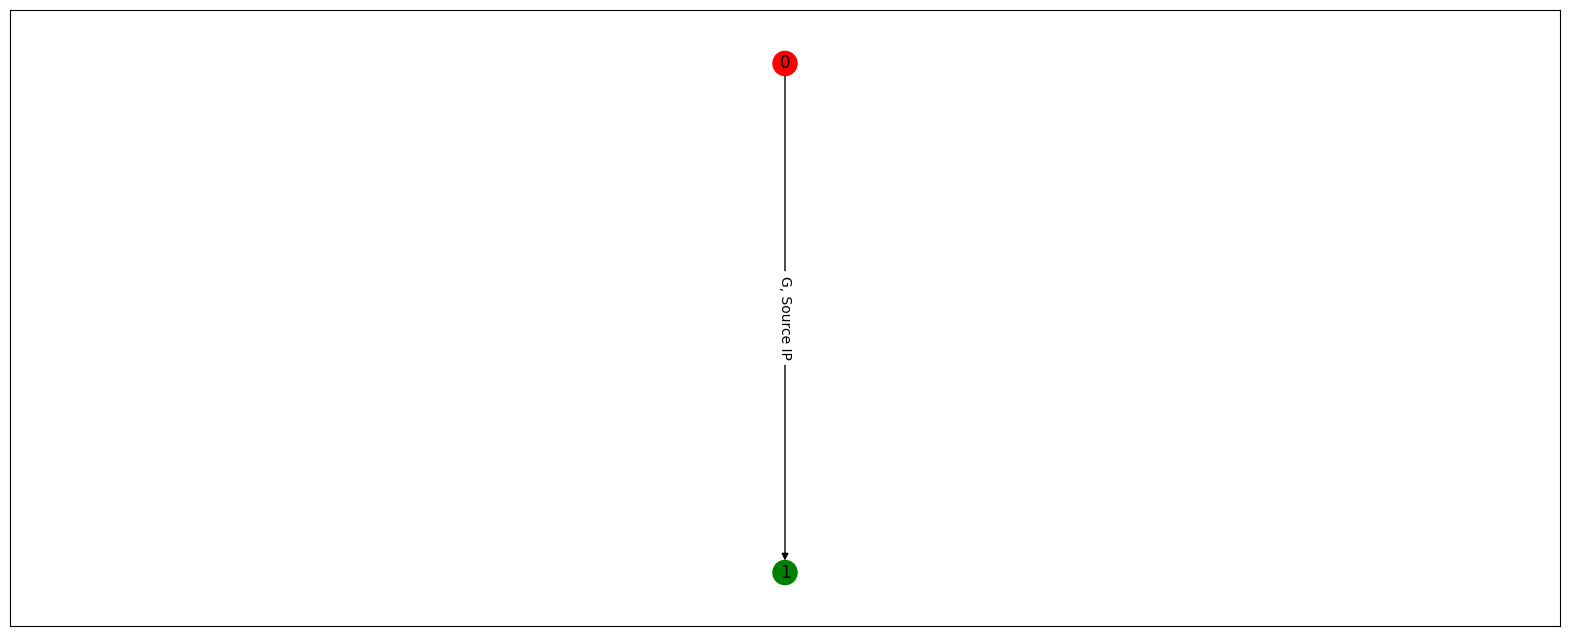

,packet_number
ip_src,
10.42.42.25,2071
10.42.42.253,7462
10.42.42.50,2079
10.42.42.56,2013


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.771858860276165
   total_interestingness: 1.771858860276165
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities


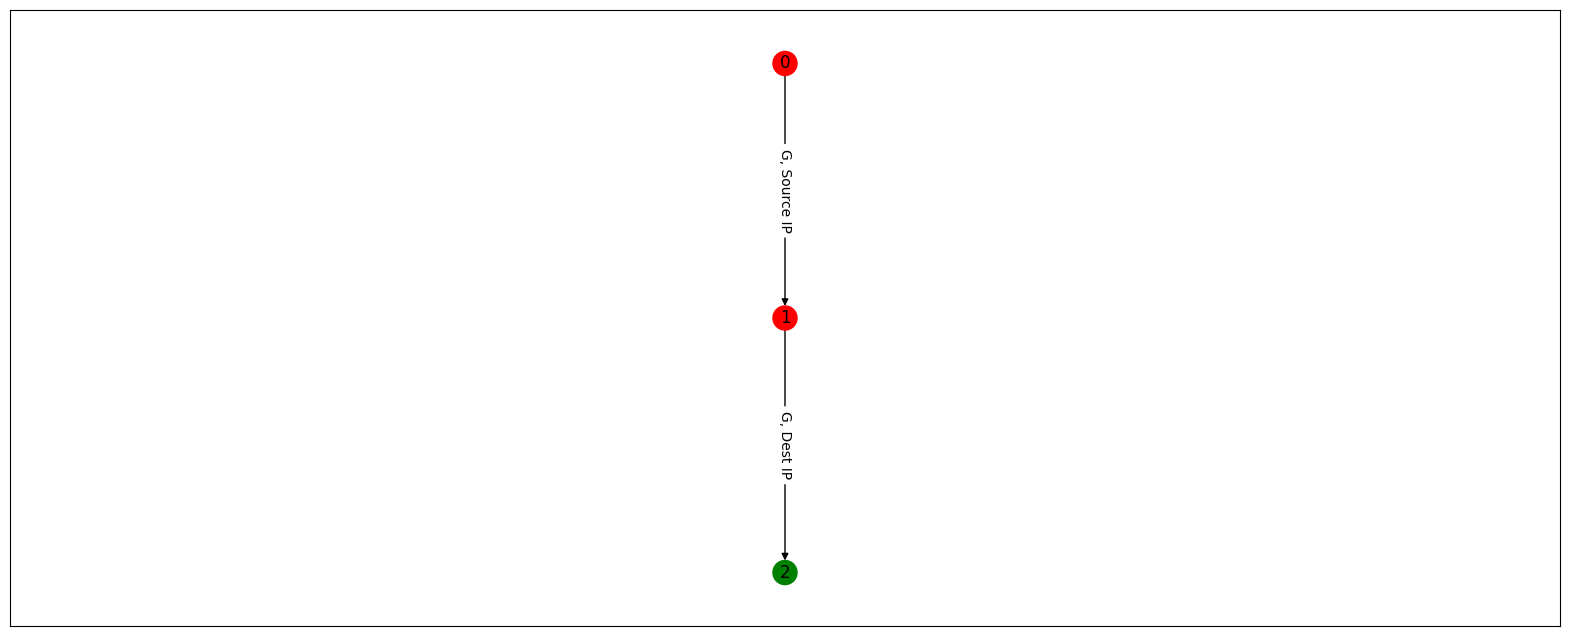

packet_number
ip_src       ip_dst                       
10.42.42.25  10.255.255.255              4
             10.42.42.253             2007
             10.42.42.50                60
10.42.42.253 10.42.42.25              3405
             10.42.42.50              2044
             10.42.42.56              2013
10.42.42.50  10.255.255.255             12
             10.42.42.25                40
             10.42.42.253             2027
10.42.42.56  10.42.42.253             2013

Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.0667122848249353
   compaction_gain: 0
   total_interestingness: 1.0667122848249353
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities


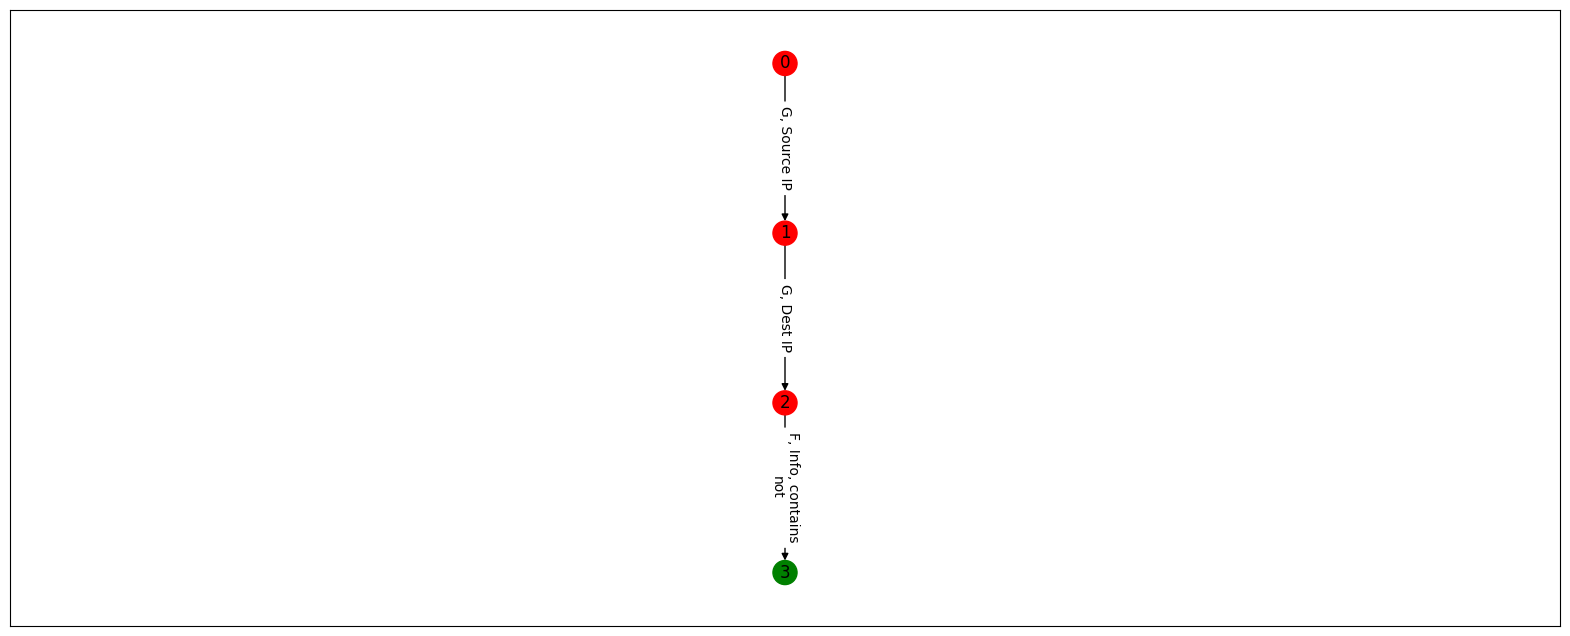

packet_number
ip_src      ip_dst                     
10.42.42.50 10.42.42.25               8
            10.42.42.253              1

Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities


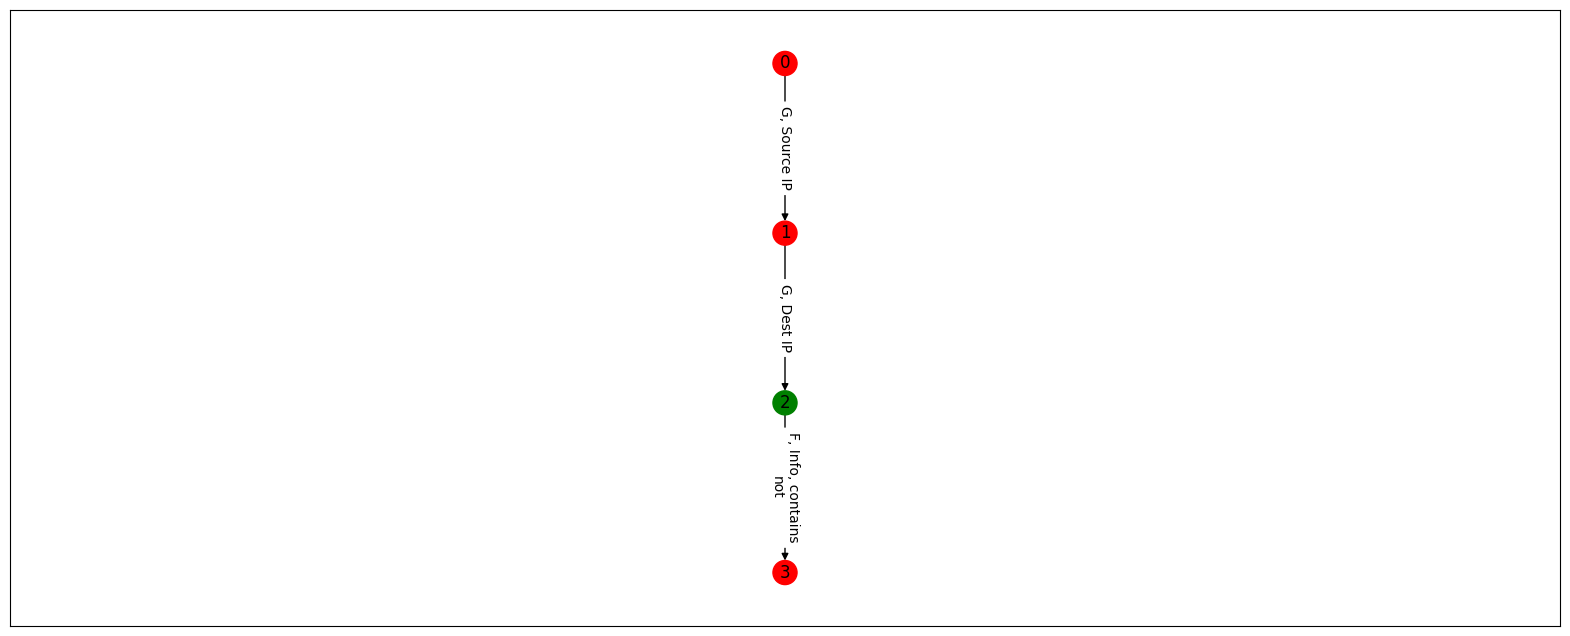

Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities


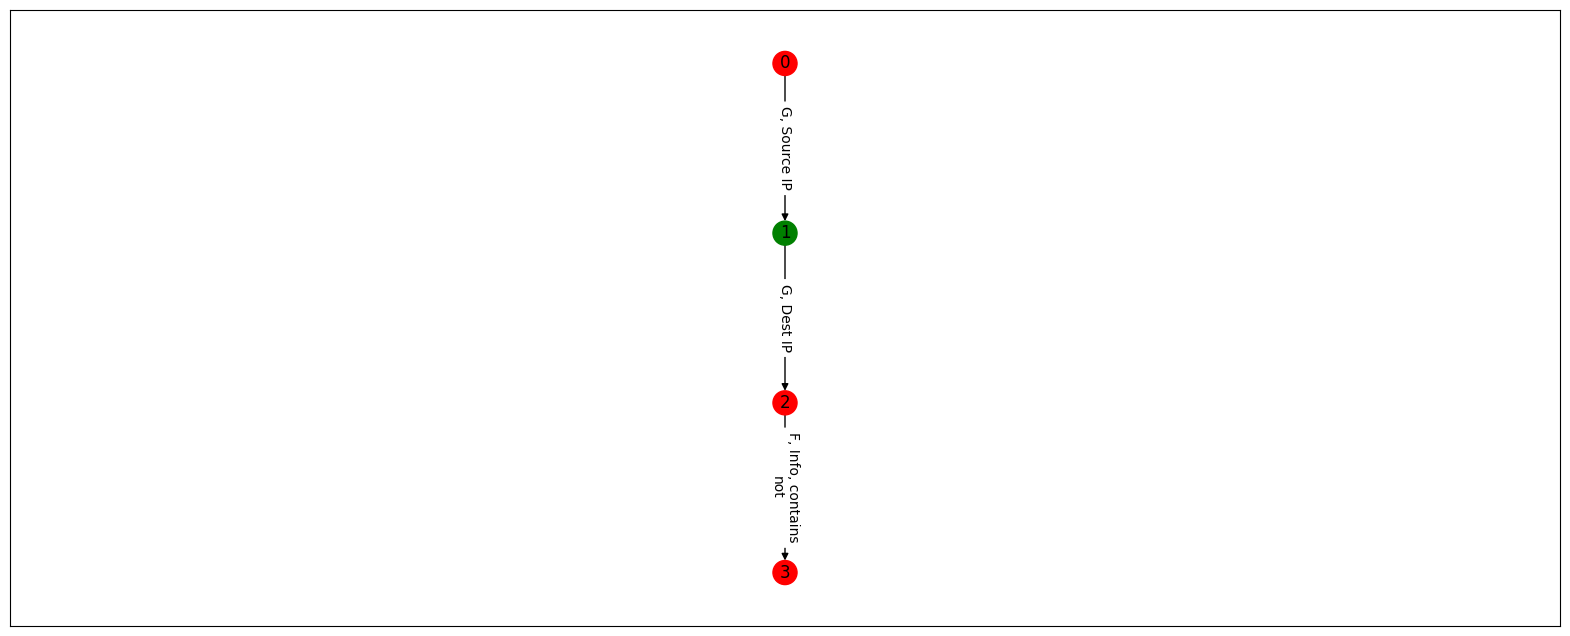

Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.01532803347324
   compaction_gain: 0
   total_interestingness: 1.01532803347324
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities


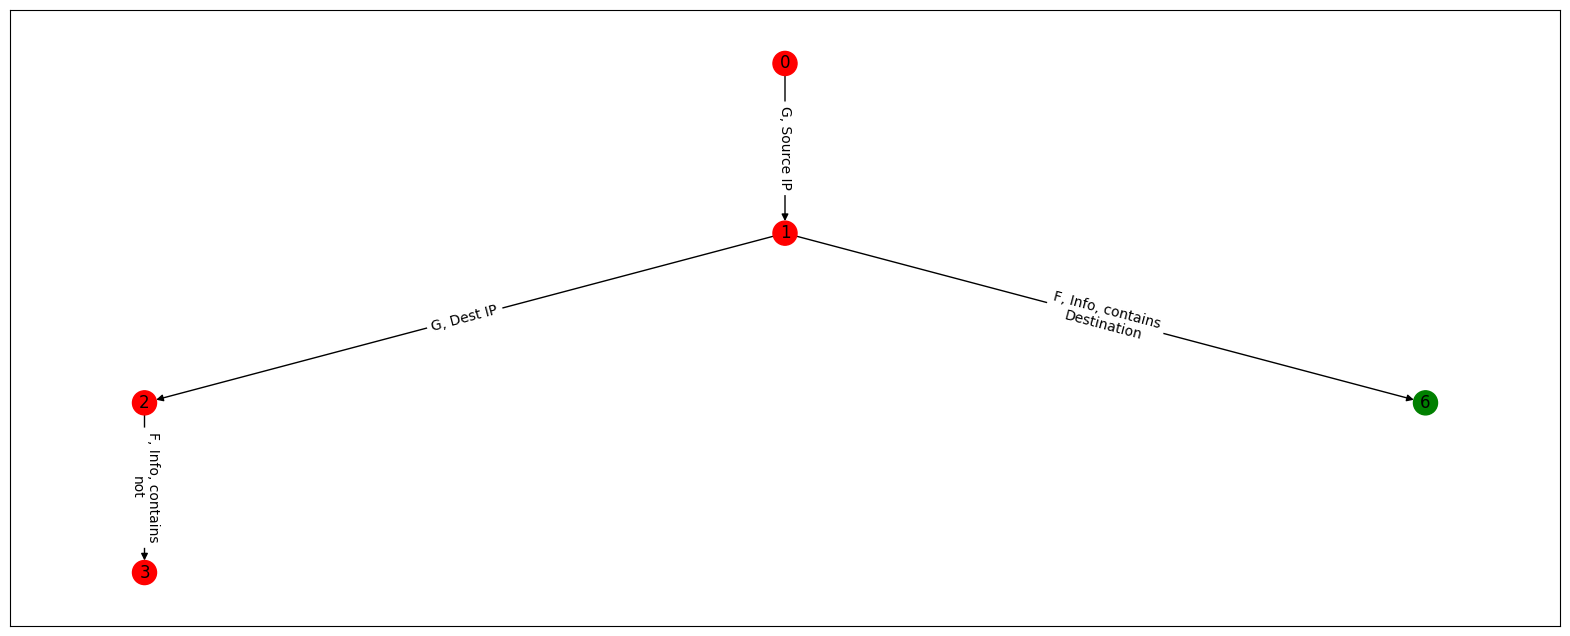

,packet_number
ip_src,
10.42.42.25,1
10.42.42.253,4
10.42.42.50,1
10.42.42.56,2


Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities


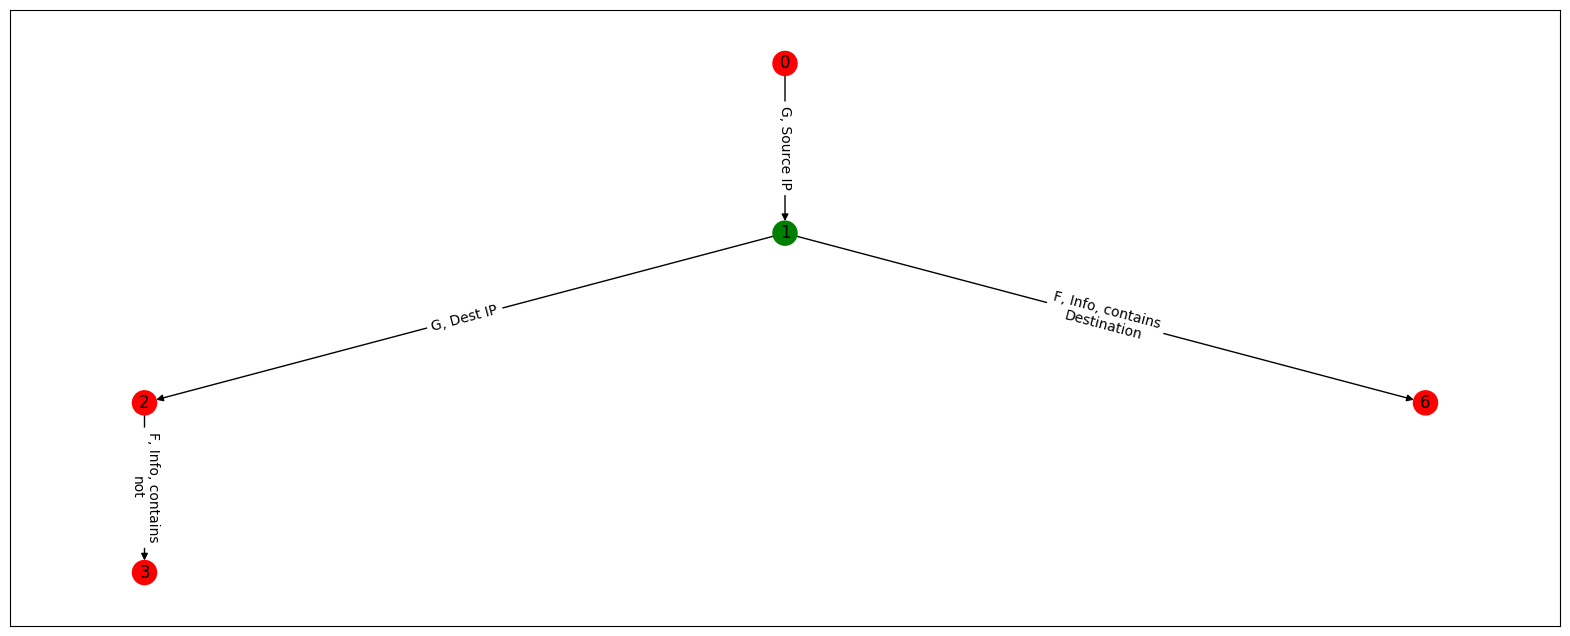

Model not loaded - returning default probabilities
BACK ACTION: humanity rewards only
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities


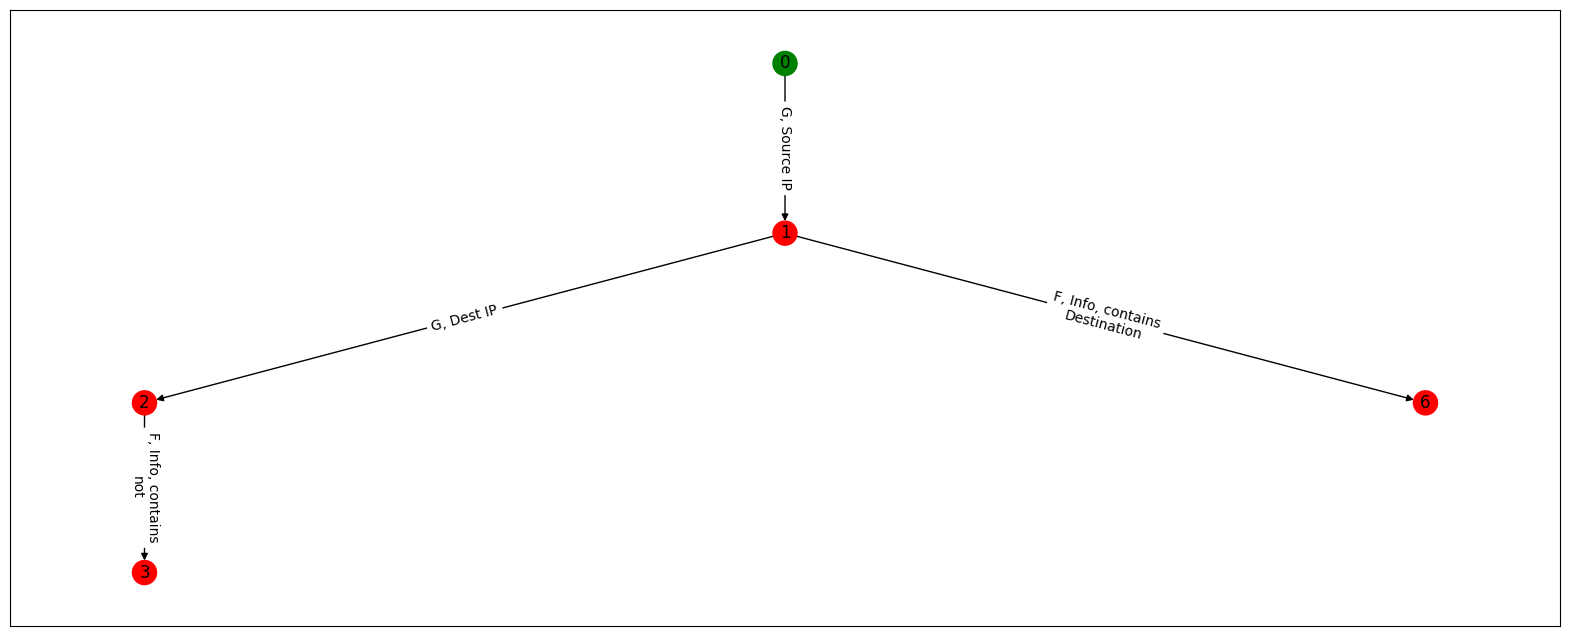

Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.972187682161801
   total_interestingness: 1.972187682161801
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities


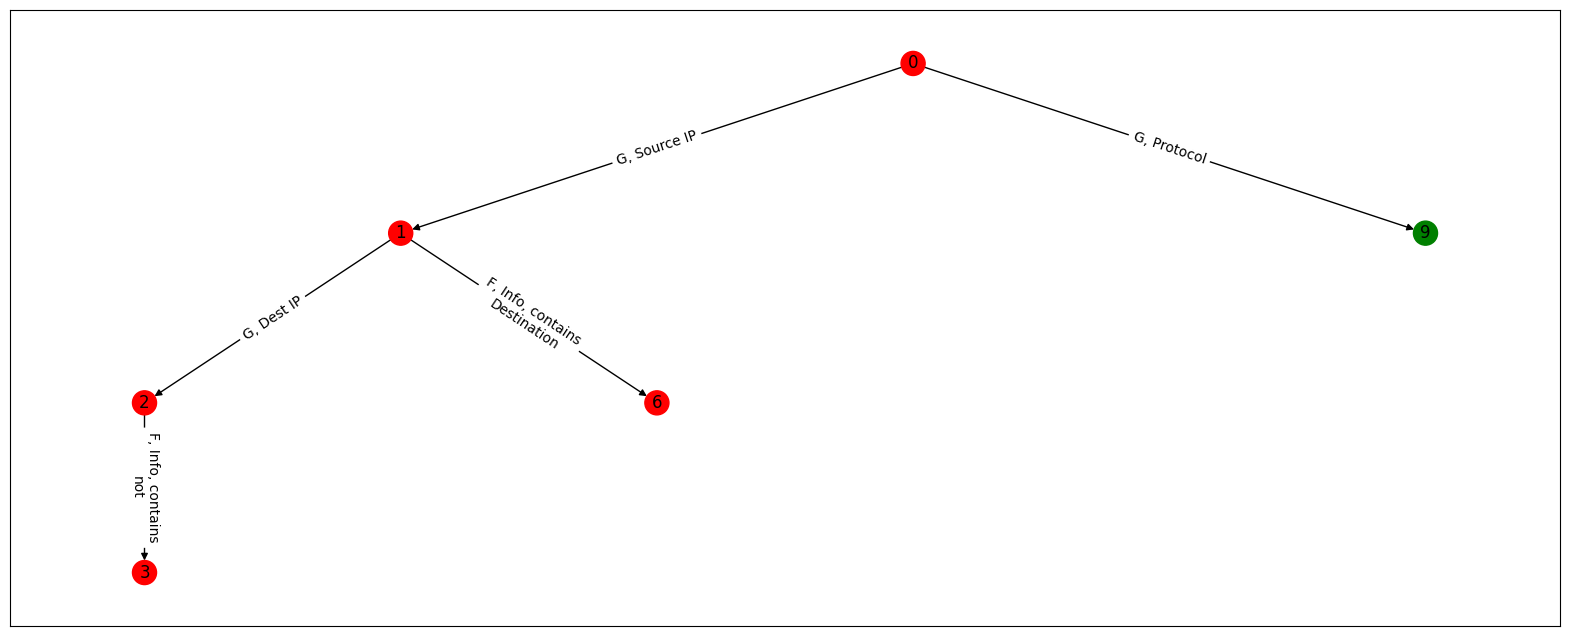

,packet_number
highest_layer,
DATA,6
DCERPC,1
ICMP,20
NBNS,20
NBSS,26
TCP,13552


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.5333909887273478
   total_interestingness: 1.5333909887273478
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities


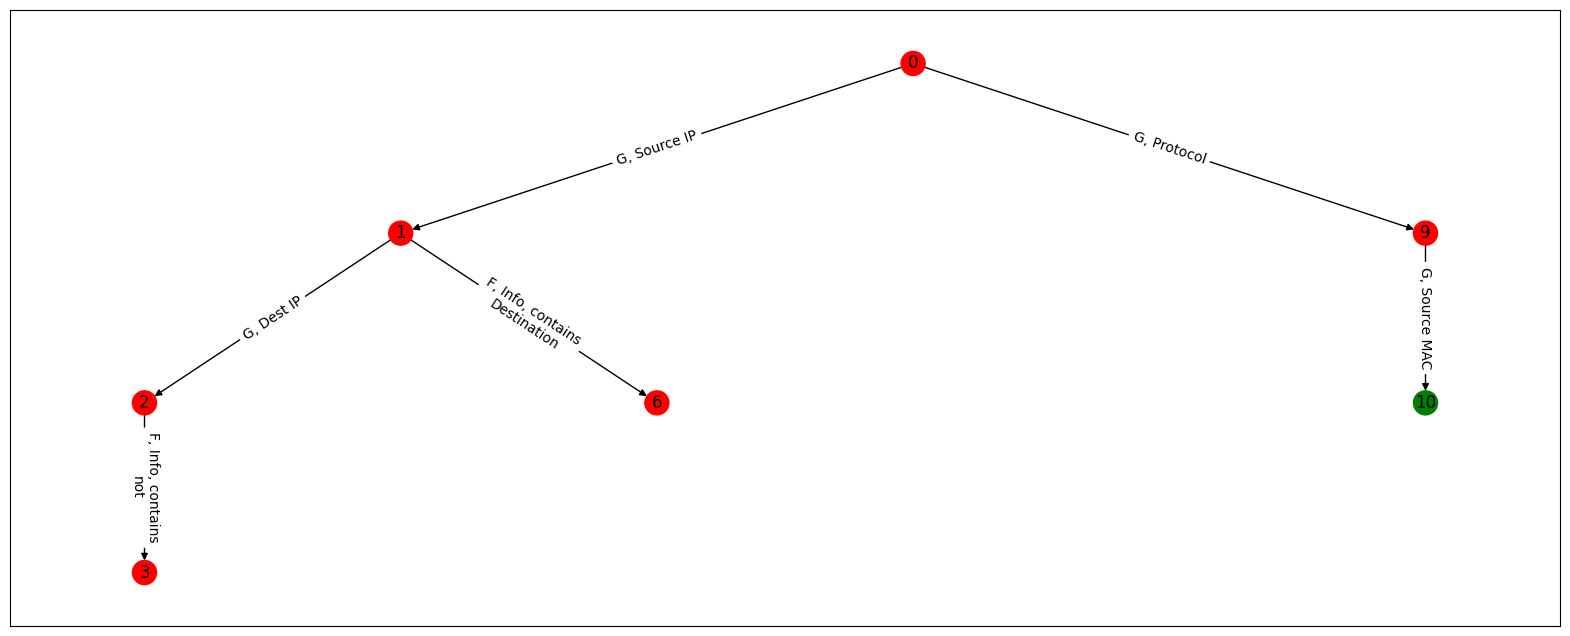

packet_number
highest_layer eth_src                         
DATA          00:23:8b:82:1f:4a              6
DCERPC        70:5a:b6:51:d7:b2              1
ICMP          00:16:cb:92:6e:dc              3
              00:23:8b:82:1f:4a              8
              00:26:22:cb:1e:79              6
              70:5a:b6:51:d7:b2              3
NBNS          00:16:cb:92:6e:dc              4
              70:5a:b6:51:d7:b2             16
NBSS          00:16:cb:92:6e:dc             12
              00:23:8b:82:1f:4a              1
              70:5a:b6:51:d7:b2             13
TCP           00:16:cb:92:6e:dc           2052
              00:23:8b:82:1f:4a           7447
              00:26:22:cb:1e:79           2007
              70:5a:b6:51:d7:b2           2046

Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
Compaction coefficient applied: 2.0
MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.014386025289930379
   total_interestingness: 0.014386025289930379
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities


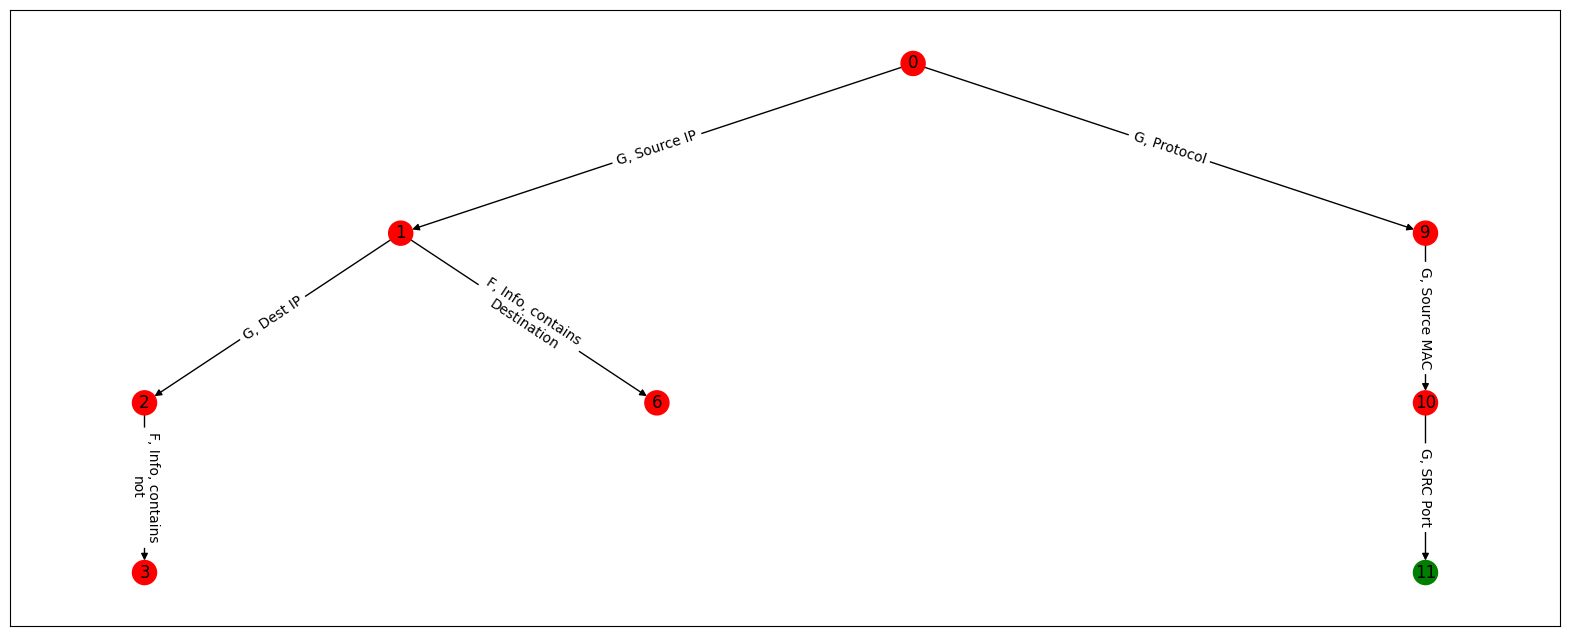

packet_number
highest_layer eth_src           tcp_srcport               
DATA          00:23:8b:82:1f:4a -1                       4
                                 43490                   1
                                 43492                   1
DCERPC        70:5a:b6:51:d7:b2  135                     1
ICMP          00:16:cb:92:6e:dc -1                       3
...                                                    ...
TCP           70:5a:b6:51:d7:b2  64623                   2
                                 64680                   2
                                 65000                   2
                                 65129                   2
                                 65389                   2

[6488 rows x 1 columns]

Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Diversity coefficient applied (main calc): 2.0
KL coefficient applied: 1.5
MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.0372924418763247
   compaction_gain: 0
   total_interestingness: 1.0372924418763247
Model not loaded - returning default probabilities
BEFORE coeff: r_snorkel_humanity=0.000000
Using current humanity_coeff: 1.0
AFTER coeff: r_snorkel_humanity=0.000000
Snorkel humanity: 0.000000


Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities
Rule-based humanity coefficient applied: 1.0
Model not loaded - returning default probabilities


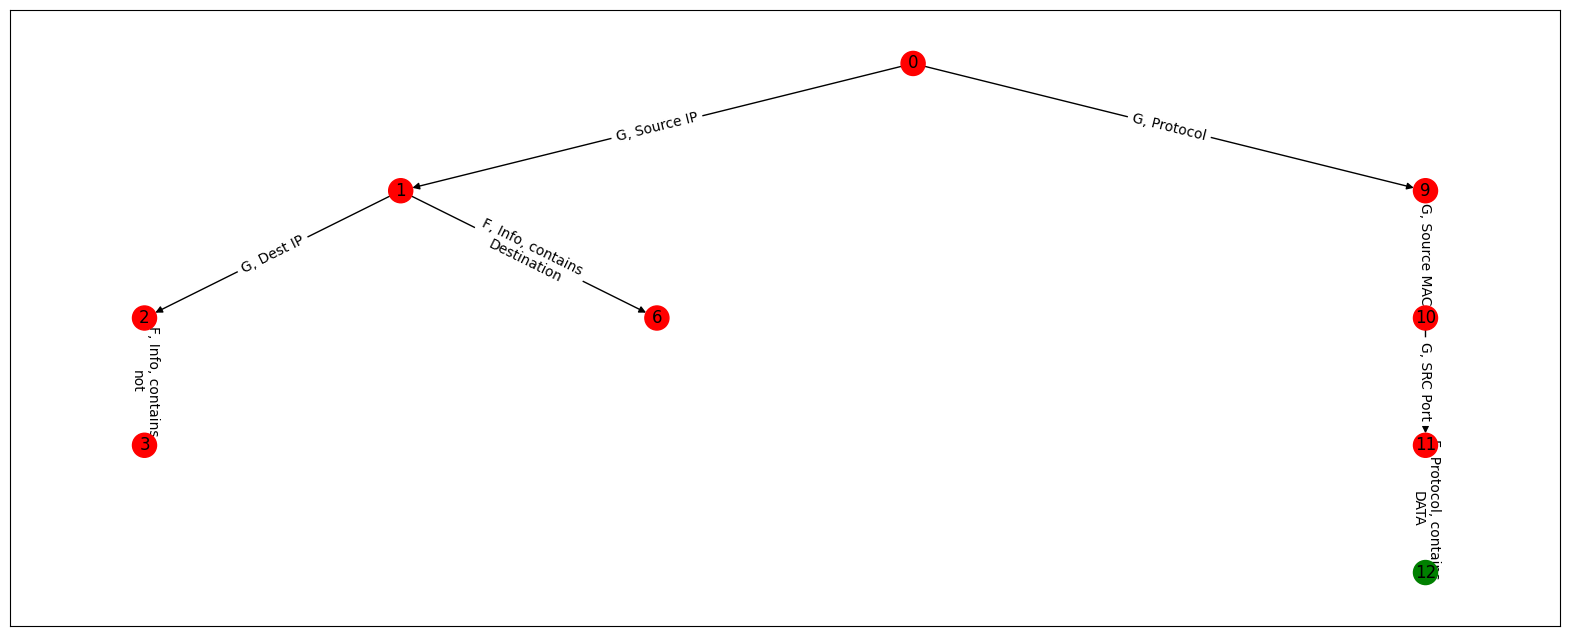

packet_number
highest_layer eth_src           tcp_srcport               
DATA          00:23:8b:82:1f:4a -1                       4
                                 43490                   1
                                 43492                   1

In [10]:
# Set dataset_number
dataset_number = 3

# Set actions
action_vecs = [
[2, 6, 0, 0.0, 0, 0],                     #  1: Group action
[2, 5, 0, 0.0, 0, 0],                     #  2: Group action
[1, 4, 8, -0.49928829073905945, 0, 0],    #  3: Filter action
[0, 0, 0, 0.0, 0, 0],                     #  4: Back
[0, 0, 0, 0.0, 0, 0],                     #  5: Back
[1, 4, 8, -0.4994085431098938, 0, 0],     #  6: Filter action
[0, 0, 0, 0.0, 0, 0],                     #  7: Back
[0, 0, 0, 0.0, 0, 0],                     #  8: Back
[2, 3, 0, 0.0, 0, 0],                     #  9: Group action
[2, 2, 0, 0.0, 0, 0],                     # 10: Group action
[2, 10, 0, 0.0, 0, 0],                    # 11: Group action
[1, 3, 8, -0.4997364282608032, 0, 0],     # 12: Filter action
]

info_hist, r_sum = run_episode_analyst_view(
    dataset_number=dataset_number,
    env=env,
    compressed=False,
    filter_by_field=True,
    continuous_filter_term=True,
    actions_lst=action_vecs,
)


## Action Vector Format

Each action is a 6-element vector: `[action_type, param1, param2, param3, param4, param5]`

### Action Types:
- `0` = Back action
- `1` = Filter action
- `2` = Group action

### For Filter Actions:
- `param1` = column index
- `param2` = condition (eq, neq, gt, lt, etc.)
- `param3` = term (continuous value mapped to actual filter term)

### For Group Actions:
- `param1` = group column index
- `param2` = aggregation column index
- `param3` = aggregation function (len, sum, mean, etc.)

### For Back Actions:
- All params are typically 0 or don't matter


## Next Steps

Now that you understand the basics, you can:

1. **Explore other notebooks:**
   - `ATENA-TF-Welcome.ipynb` - Modern introduction with trained agents
   - `Live_Recommendations_System.ipynb` - Interactive recommender
   - `Master_Compatible_Evaluation.ipynb` - Comprehensive evaluation
   - `evaluate_agent_notebook.ipynb` - Agent performance analysis

2. **Train your own agent:**
   ```bash
   python main.py
   ```

3. **Modify configurations:**
   - Edit `Configuration/config.py` to change:
     - Reward coefficients
     - Dataset schema
     - Episode length
     - Training hyperparameters

4. **Create custom action sequences:**
   - Use the action vector format above
   - Test different exploration strategies
   - Compare rewards across different approaches

5. **Analyze reward components:**
   - Study which actions get high rewards
   - Understand the humanity scoring
   - Optimize for different reward components


## Key Differences from Original ATENA-Master

While this notebook replicates the original structure, there are some key differences in the TF2 version:

1. **Backend**: Uses TensorFlow 2 instead of ChainerRL
2. **Algorithm**: PPO implementation instead of ChainerRL's PPO
3. **Environment**: Enhanced environment with better logging and tracking
4. **Snorkel**: Updated Snorkel compatibility layer for newer Python/libraries
5. **Reward System**: Improved reward stabilization and coefficient handling
6. **Evaluation**: More comprehensive evaluation metrics and tools

The core ATENA concepts, action space, and reward structure remain the same!
